In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from tensorflow import keras


C:\Users\johnr\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Data Overview

In [2]:
data = pd.read_csv("C:/Users/johnr/OneDrive/Documents/Tesla Predictions/TSLA Training.csv")
data.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-06-22,23.436001,23.483334,22.133333,22.242001,22.242001,153991500
1,2018-06-25,22.007999,22.564667,21.833332,22.200666,22.200666,103969500


In [3]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,147.096224,150.516810,143.380293,147.045863,147.045863,1.364913e+08
std,113.549083,116.105483,110.658665,113.397564,113.397564,8.912683e+07
min,12.073333,12.445333,11.799333,11.931333,11.931333,2.940180e+07
25%,22.677334,23.140667,22.246000,22.635332,22.635332,7.870950e+07
50%,152.639999,155.300003,146.703339,149.919998,149.919998,1.087617e+08
75%,237.283340,241.800003,233.133331,237.036667,237.036667,1.650015e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


**EDA**

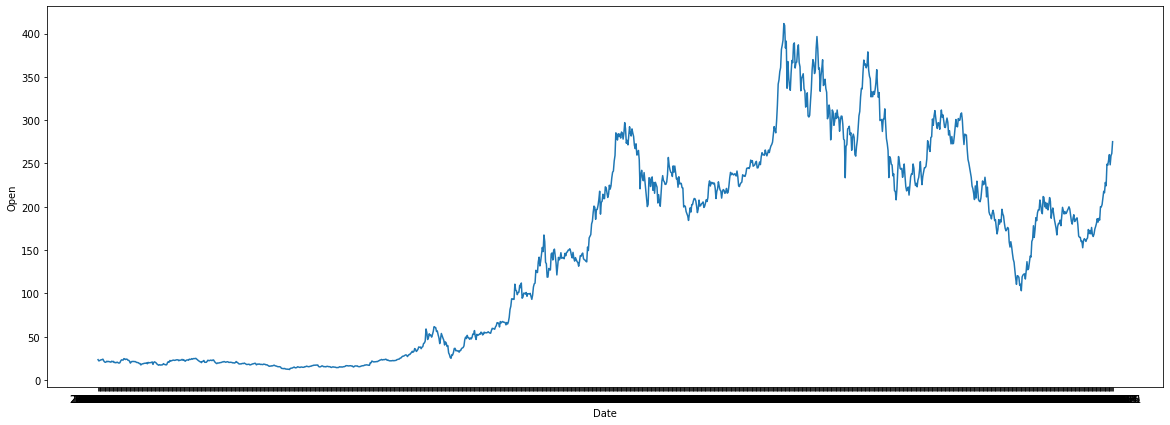

In [4]:
plt.figure(figsize=(20,7))
sns.lineplot(data = data, x = 'Date', y = 'Open')
plt.show()

In [5]:
# plt.figure(figsize=(20,7))
# sns.lineplot(data = data, x = 'Date', y = 'Volume')
# plt.show()

# SCALING AND TRAIN TEST SPLIT

In [6]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
scaledData = pd.DataFrame(standardScaler.fit_transform(data.drop('Date', axis = 1)),columns = standardScaler.feature_names_in_)
scaledData.head(2)

,Open,High,Low,Close,Adj Close,Volume
0,-1.089480,-1.094557,-1.096120,-1.101025,-1.101025,0.196429
1,-1.102061,-1.102472,-1.098833,-1.101390,-1.101390,-0.365039


In [7]:
X = pd.DataFrame(scaledData[['High', 'Low', 'Close', 'Adj Close', 'Volume']].copy())
Y = pd.Series(scaledData['Open'].copy())

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 42)

## Regression Model

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

#Fitting and predicting the model using LinearRegression 
linearRegression = LinearRegression()
linearRegression.fit(X_train, Y_train)
LRPredictions = pd.DataFrame(linearRegression.predict(X_test))

# Calculating Mean Absolute Error
print(mean_absolute_error(LRPredictions, Y_test))

0.01437899692349187


## Gradient Boost Regressor

In [10]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor()
GBR.fit(X_train, Y_train)
GBRPreds = pd.DataFrame(GBR.predict(X_test))

# Calculating Mean Absolute Error
print(mean_absolute_error(GBRPreds, Y_test))

0.021720777724051996


## XGBoost Regressor

In [11]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, Y_train)
xgb_preds = pd.DataFrame(xgb.predict(X_test))


# Calculating Mean Absolute Error
print(mean_absolute_error(xgb_preds, Y_test))

0.021609321181975356


In [94]:
numpy_data = scaledData[['High', 'Low', 'Close', 'Adj Close', 'Volume', 'Open']].to_numpy()

X_numpy = numpy_data[:,0:5]
Y_numpy = numpy_data[:,5:6]

#Train Test Split
Xnum_train, Xnum_test, Ynum_train, Ynum_test = train_test_split(X_numpy,Y_numpy, test_size = 0.25, random_state = 42)

#Creating Sequential Neural Network using Keras
model = keras.Sequential()

#First layer with 5 inputs
model.add(keras.layers.Dense(128, input_shape = (5,), name = 'First_Layer', activation= 'relu'))

#Second layer 
model.add(keras.layers.Dense(128, name = 'Second_Layer', activation = 'relu'))

#Output Later
model.add(keras.layers.Dense(1, name = 'Output_Layer', activation = 'relu'))

#Compiling the model
model.compile(optimizer='adam', loss='mse', metrics = ['mse'])

#Fitting the model
history = model.fit(x = Xnum_train, y = Ynum_train, batch_size = 100, epochs = 500, verbose = 1)

#Predicting Using the model
keras_preds = model.predict(x = Xnum_test)

Epoch 1/500
10/10 [==============================] - 1s 4ms/step - loss: 0.6172 - mse: 0.6172
Epoch 2/500
10/10 [==============================] - 0s 4ms/step - loss: 0.4939 - mse: 0.4939
Epoch 3/500
10/10 [==============================] - 0s 4ms/step - loss: 0.4712 - mse: 0.4712
Epoch 4/500
10/10 [==============================] - 0s 3ms/step - loss: 0.4681 - mse: 0.4681
Epoch 5/500
10/10 [==============================] - 0s 4ms/step - loss: 0.4676 - mse: 0.4676
Epoch 6/500
10/10 [==============================] - 0s 4ms/step - loss: 0.4670 - mse: 0.4670
Epoch 7/500
10/10 [==============================] - 0s 4ms/step - loss: 0.4668 - mse: 0.4668
Epoch 8/500
10/10 [==============================] - 0s 4ms/step - loss: 0.4667 - mse: 0.4667
Epoch 9/500
10/10 [==============================] - 0s 4ms/step - loss: 0.4667 - mse: 0.4667
Epoch 10/500
10/10 [==============================] - 0s 3ms/step - loss: 0.4667 - mse: 0.4667
Epoch 11/500
10/10 [==============================] - 0s 4m

10/10 [==============================] - 0s 4ms/step - loss: 0.4656 - mse: 0.4656
Epoch 88/500
10/10 [==============================] - 0s 3ms/step - loss: 0.4656 - mse: 0.4656
Epoch 89/500
10/10 [==============================] - 0s 3ms/step - loss: 0.4656 - mse: 0.4656
Epoch 90/500
10/10 [==============================] - 0s 4ms/step - loss: 0.4657 - mse: 0.4657
Epoch 91/500
10/10 [==============================] - 0s 4ms/step - loss: 0.4657 - mse: 0.4657
Epoch 92/500
10/10 [==============================] - 0s 4ms/step - loss: 0.4656 - mse: 0.4656
Epoch 93/500
10/10 [==============================] - 0s 4ms/step - loss: 0.4656 - mse: 0.4656
Epoch 94/500
10/10 [==============================] - 0s 4ms/step - loss: 0.4656 - mse: 0.4656
Epoch 95/500
10/10 [==============================] - 0s 4ms/step - loss: 0.4656 - mse: 0.4656
Epoch 96/500
10/10 [==============================] - 0s 4ms/step - loss: 0.4657 - mse: 0.4657
Epoch 97/500
10/10 [==============================] - 0s 3ms/st

10/10 [==============================] - 0s 3ms/step - loss: 0.4656 - mse: 0.4656
Epoch 173/500
10/10 [==============================] - 0s 4ms/step - loss: 0.4656 - mse: 0.4656
Epoch 174/500
10/10 [==============================] - 0s 4ms/step - loss: 0.4656 - mse: 0.4656
Epoch 175/500
10/10 [==============================] - 0s 4ms/step - loss: 0.4656 - mse: 0.4656
Epoch 176/500
10/10 [==============================] - 0s 4ms/step - loss: 0.4656 - mse: 0.4656
Epoch 177/500
10/10 [==============================] - 0s 4ms/step - loss: 0.4656 - mse: 0.4656
Epoch 178/500
10/10 [==============================] - 0s 4ms/step - loss: 0.4656 - mse: 0.4656
Epoch 179/500
10/10 [==============================] - 0s 4ms/step - loss: 0.4656 - mse: 0.4656
Epoch 180/500
10/10 [==============================] - 0s 3ms/step - loss: 0.4656 - mse: 0.4656
Epoch 181/500
10/10 [==============================] - 0s 3ms/step - loss: 0.4656 - mse: 0.4656
Epoch 182/500
10/10 [==============================] -

10/10 [==============================] - 0s 4ms/step - loss: 0.4657 - mse: 0.4657
Epoch 258/500
10/10 [==============================] - 0s 3ms/step - loss: 0.4657 - mse: 0.4657
Epoch 259/500
10/10 [==============================] - 0s 4ms/step - loss: 0.4656 - mse: 0.4656
Epoch 260/500
10/10 [==============================] - 0s 3ms/step - loss: 0.4656 - mse: 0.4656
Epoch 261/500
10/10 [==============================] - 0s 4ms/step - loss: 0.4656 - mse: 0.4656
Epoch 262/500
10/10 [==============================] - 0s 4ms/step - loss: 0.4656 - mse: 0.4656
Epoch 263/500
10/10 [==============================] - 0s 4ms/step - loss: 0.4658 - mse: 0.4658
Epoch 264/500
10/10 [==============================] - 0s 4ms/step - loss: 0.4657 - mse: 0.4657
Epoch 265/500
10/10 [==============================] - 0s 4ms/step - loss: 0.4656 - mse: 0.4656
Epoch 266/500
10/10 [==============================] - 0s 3ms/step - loss: 0.4656 - mse: 0.4656
Epoch 267/500
10/10 [==============================] -

10/10 [==============================] - 0s 4ms/step - loss: 0.4657 - mse: 0.4657
Epoch 343/500
10/10 [==============================] - 0s 4ms/step - loss: 0.4656 - mse: 0.4656
Epoch 344/500
10/10 [==============================] - 0s 4ms/step - loss: 0.4656 - mse: 0.4656
Epoch 345/500
10/10 [==============================] - 0s 3ms/step - loss: 0.4655 - mse: 0.4655
Epoch 346/500
10/10 [==============================] - 0s 3ms/step - loss: 0.4656 - mse: 0.4656
Epoch 347/500
10/10 [==============================] - 0s 3ms/step - loss: 0.4656 - mse: 0.4656
Epoch 348/500
10/10 [==============================] - 0s 4ms/step - loss: 0.4655 - mse: 0.4655
Epoch 349/500
10/10 [==============================] - 0s 4ms/step - loss: 0.4656 - mse: 0.4656
Epoch 350/500
10/10 [==============================] - 0s 4ms/step - loss: 0.4656 - mse: 0.4656
Epoch 351/500
10/10 [==============================] - 0s 4ms/step - loss: 0.4656 - mse: 0.4656
Epoch 352/500
10/10 [==============================] -

10/10 [==============================] - 0s 3ms/step - loss: 0.4655 - mse: 0.4655
Epoch 428/500
10/10 [==============================] - 0s 4ms/step - loss: 0.4655 - mse: 0.4655
Epoch 429/500
10/10 [==============================] - 0s 2ms/step - loss: 0.4656 - mse: 0.4656
Epoch 430/500
10/10 [==============================] - 0s 4ms/step - loss: 0.4656 - mse: 0.4656
Epoch 431/500
10/10 [==============================] - 0s 4ms/step - loss: 0.4656 - mse: 0.4656
Epoch 432/500
10/10 [==============================] - 0s 3ms/step - loss: 0.4656 - mse: 0.4656
Epoch 433/500
10/10 [==============================] - 0s 3ms/step - loss: 0.4655 - mse: 0.4655
Epoch 434/500
10/10 [==============================] - 0s 3ms/step - loss: 0.4656 - mse: 0.4656
Epoch 435/500
10/10 [==============================] - 0s 3ms/step - loss: 0.4655 - mse: 0.4655
Epoch 436/500
10/10 [==============================] - 0s 3ms/step - loss: 0.4655 - mse: 0.4655
Epoch 437/500
10/10 [==============================] -

In [82]:
keras_preds = model.predict(x = Xnum_test)

10/10 [==============================] - 0s 3ms/step


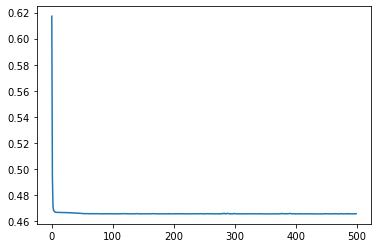

In [95]:
plt.plot(history.history['mse'])

In [96]:
keras_preds.shape

(315, 1)

# Running Predictions on the 'Test.csv' Data

In [14]:
test_data = pd.read_csv("C:/Users/johnr/OneDrive/Documents/Tesla Predictions/TSLA Testing.csv")
real_stock_price = pd.DataFrame(test_data.iloc[:, 1:2])

In [15]:
testData_scaled = pd.DataFrame(standardScaler.fit_transform(test_data.drop('Date', axis = 1)),columns = standardScaler.feature_names_in_ )
predictionFeatures = testData_scaled[['High', 'Low', 'Close', 'Adj Close', 'Volume']]
predictionFeatures['Open'] = linearRegression.predict(predictionFeatures)


# predicted_stock_price = pd.DataFrame(linearRegression.predict(predictionFeatures))
# # predicted_stock_price.rename(columns = {0:'Open'}, inplace = True)
# # predicted_stock_price.head(2)

In [16]:
predictionFeatures = pd.DataFrame(standardScaler.inverse_transform(predictionFeatures), columns = standardScaler.feature_names_in_)
predictionFeatures.head(2)

,Open,High,Low,Close,Adj Close,Volume
0,241.653838,244.462030,230.713525,236.086670,190.242892,1.526912e+08
1,234.233401,239.131477,229.709360,235.070007,193.444397,1.428911e+08


In [17]:
test_data.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-22,234.503326,246.833328,233.826660,236.086670,236.086670,101107500
1,2022-06-23,237.906662,239.316666,228.636673,235.070007,235.070007,104202600


In [18]:
real_stock_price = test_data['Open']
predicted_stock_price = predictionFeatures['Open']

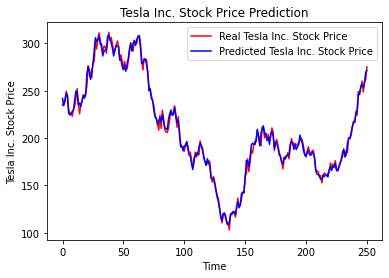

In [34]:
plt.plot(real_stock_price, color='red', label='Real Tesla Inc. Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Tesla Inc. Stock Price')
plt.title('Tesla Inc. Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Tesla Inc. Stock Price')
plt.legend()
plt.show()